Hola **Aldo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

# **Sprint 9**

## **Descripción del proyecto**
Te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing.  

Cuentas con:

* Registros del servidor con datos sobre las visitas a Showz desde Enero de 2017 hasta Diciembre de 2018;
* Un archivo con los pedidos en este periodo;
* Estadísticas de gastos de marketing.

Lo que vas a investigar:  

* Cómo los clientes usan el servicio.
* Cuándo empiezan a comprar.
* Cuánto dinero aporta cada cliente a la compañía.
* Cuándo los ingresos cubren el costo de adquisición de los clientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buena práctica el dejar la introducción al proyecto, para que sea un poco más claro también puedes redactar el título de forma más descriptiva hacia lo que se realizará
</div>

## **Paso 1. Accede a los datos y prepáralos para el análisis**

### Importación de librerías

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Carga de datos

In [2]:
visitas = pd.read_csv("visits_log_us.csv")
pedidos = pd.read_csv("orders_log_us.csv")
gastos = pd.read_csv("costs_us.csv")

/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3308: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Análisis exploratorio de Datos

* #### DataFrame visitas

In [3]:
# Información general.
print("Información general:\n")
print(visitas.info())

# Información estadística.
print("\nInformación estadística:\n")
print(visitas.describe()) 

# Busca valores nulos.
print("\nValores nulos:\n") 
print(visitas.isna().sum())

# Busca registros duplicados.
print(f"\nRegistros duplicados: {visitas.duplicated().sum()}") 

# Primeros 5 registros.
print("\nPrimeros 5 registros:\n")
display(visitas.head())

# Últimos 5 registros.
print("\nÚltimos 5 registros:\n")
display(visitas.tail()) 

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165044 entries, 0 to 165043
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     165044 non-null  object
 1   End Ts     165044 non-null  object
 2   Source Id  165044 non-null  int64 
 3   Start Ts   165044 non-null  object
 4   Uid        165044 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.3+ MB
None

Información estadística:

           Source Id
count  165044.000000
mean        3.747316
std         1.910949
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        10.000000

Valores nulos:

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Registros duplicados: 0

Primeros 5 registros:



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



Últimos 5 registros:



,Device,End Ts,Source Id,Start Ts,Uid
165039,touch,2018-01-07 15:13:00,4,2018-01-07 15:03:00,12723545635027880701
165040,desktop,2017-12-25 00:52:00,3,2017-12-25 00:47:00,8695443775189843440
165041,desktop,2017-06-09 10:57:00,3,2017-06-09 10:36:00,16785265129205842973
165042,desktop,2017-11-20 21:41:00,3,2017-11-20 21:22:00,1760497825039238161
165043,touch,2017-11-24 12:42:00,9,2017-11-24 1,


#### Observaciones:

* Por convención se recomienda que los nombres de las columnas sean en formato "snake_case". Se recomienda también nombres más descriptivos para las columnas, de forma que faciliten su comprensión.
* Cambiar tipos de datos:
  - Columnas "Start Ts" y "End Ts" ---> a tipo datetime.
  - Columna "Source Id" ---> a tipo str.

* #### DataFrame pedidos

In [4]:
# Información general.
print("Información general:\n")
print(pedidos.info())

# Información estadística.
print("\nInformación estadística:\n")
print(pedidos.describe())

# Busca valores nulos.
print("\nValores nulos:\n") 
print(pedidos.isna().sum())

# Busca registros duplicados.
print(f"\nRegistros duplicados: {pedidos.duplicated().sum()}") 

# Primeros 5 registros.
print("\nPrimeros 5 registros:\n")
display(pedidos.head())

# Últimos 5 registros.
print("\nÚltimos 5 registros:\n")
display(pedidos.tail())

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Información estadística:

            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

Valores nulos:

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Registros duplicados: 0

Primeros 5 registros:



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



Últimos 5 registros:



,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


#### Observaciones:

* Por convención se recomienda que los nombres de las columnas sean en formato "snake_case". Se recomienda también nombres más descriptivos para las columnas, de forma que faciliten su comprensión.
* Cambiar tipos de datos:
  - Columna "Buy Ts" ---> a tipo datetime.
  - Columna "Uid" ---> a tipo str.
* Según los datos estadísticos, la columna "Revenue" tiene un valor mínimo de 0.0, por lo cual, se recomienda eliminar aquellos registros con estos valores, ya que nos enfocaremos en hacer análisis en pedidos que sí representen fuentes de ingreso. 

* #### DataFrame gastos

In [5]:
# Información general.
print("Información general:\n")
print(gastos.info())

# Información estadística.
print("\nInformación estadística:\n")
print(gastos.describe())

# Busca valores nulos.
print("\nValores nulos:\n") 
print(gastos.isna().sum())

# Busca registros duplicados.
print(f"\nRegistros duplicados: {gastos.duplicated().sum()}") 

# Primeros 5 registros.
print("\nPrimeros 5 registros:\n")
display(gastos.head())

# Últimos 5 registros.
print("\nÚltimos 5 registros:\n")
display(gastos.tail()) # Últimos 5 registros.

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

Información estadística:

         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

Valores nulos:

source_id    0
dt           0
costs        0
dtype: int64

Registros duplicados: 0

Primeros 5 registros:



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



Últimos 5 registros:



,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


#### Observaciones generales:

* Por convención se recomienda que los nombres de las columnas sean en formato "snake_case". Se recomienda también un nombre más descriptivos para la columna "dt", de forma que facilite su comprensión.
* Cambiar tipos de datos:
  - Columna "source_id" ---> a tipo str.
  - Columna "dt" ---> a tipo datetime.


### Limpieza de datos

* #### DataFrame visitas

In [6]:
# Estandariza nombres de los campos.
visitas.columns = visitas.columns.str.replace(" ", "_").str.lower()

# Renombra columnas.
visitas.rename(columns={"end_ts": "end_time", "start_ts": "start_time", "uid": "user_id"}, inplace=True)

# Cambia el tipo de dato de la columna "source_id" a tipo str.
visitas["source_id"] = visitas["source_id"].astype(str)

# Cambia el tipo de dato de las columnas "start_time" y "end_time" a tipo datetime.
visitas["start_time"] = pd.to_datetime(visitas["start_time"], errors="coerce")
visitas["end_time"] = pd.to_datetime(visitas["end_time"], errors="coerce")

# Crea la columna "duration" con la duración de las sesiones.
visitas["duration"] = visitas["end_time"] - visitas["start_time"]

# Conserva los registros cuyas sesiones son mayor a 10 segundos.
visitas = visitas.loc[visitas["duration"] > pd.Timedelta(seconds=10)]

# # Crea la columna "date" y extrae la fecha.
# visitas["date"] = visitas["start_time"].dt.date

# Cambia el orden de las columnas.
columnas_ordenadas_visitas = ["start_time", "end_time", "duration", "device", "source_id", "user_id"]
visitas = visitas[columnas_ordenadas_visitas]

# Verifica los cambios realizados.
print(visitas.info())
print(visitas.describe())
display(visitas.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148551 entries, 0 to 165042
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   start_time  148551 non-null  datetime64[ns] 
 1   end_time    148551 non-null  datetime64[ns] 
 2   duration    148551 non-null  timedelta64[ns]
 3   device      148551 non-null  object         
 4   source_id   148551 non-null  object         
 5   user_id     148551 non-null  object         
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 7.9+ MB
None
                        duration
count                     148551
mean   0 days 00:11:52.266898236
std    0 days 00:16:57.615726039
min              0 days 00:01:00
25%              0 days 00:02:00
50%              0 days 00:06:00
75%              0 days 00:15:00
max              0 days 09:02:00


,start_time,end_time,duration,device,source_id,user_id
0,2017-12-20 17:20:00,2017-12-20 17:38:00,0 days 00:18:00,touch,4,16879256277535980062
1,2018-02-19 16:53:00,2018-02-19 17:21:00,0 days 00:28:00,desktop,2,104060357244891740
3,2018-05-20 10:59:00,2018-05-20 11:23:00,0 days 00:24:00,desktop,9,16174680259334210214
5,2017-09-03 21:35:00,2017-09-03 21:36:00,0 days 00:01:00,desktop,5,16007536194108375387
6,2018-01-30 11:13:00,2018-01-30 12:09:00,0 days 00:56:00,desktop,1,6661610529277171451


* Se corrigieron tipos de datos.  
* Se creó una nueva columna "duration" que almacena la duración de cada sesión.
* Se cambió el orden de las columnas para mantener un orden lógico.

* #### DataFrame pedidos 

In [7]:
# Estandariza nombres de los campos.
pedidos.columns = pedidos.columns.str.replace(" ", "_").str.lower()

# Renombra columnas.
pedidos.rename(columns={"buy_ts": "buy_time", "uid": "user_id"}, inplace=True)

# Cambia el tipo de dato de la columna "user_id" a tipo str.
pedidos["user_id"] = pedidos["user_id"].astype(str)
# Cambia el tipo de dato de la columna "buy_time" a tipo datetime.
pedidos["buy_time"] = pd.to_datetime(pedidos["buy_time"])

# Crea la columna "buy_date" y extrae la fecha.
pedidos["buy_date"] = pedidos["buy_time"].dt.date

# Conserva los registros donde las ganancias ("revenue") son mayor a 0.
pedidos = pedidos.loc[pedidos["revenue"] > 0]

# Cambia el orden de las columnas.
columnas_ordenadas_pedidos = ["buy_date", "buy_time", "revenue", "user_id"]
pedidos = pedidos[columnas_ordenadas_pedidos]

# Verifica los cambios realizados.
print(pedidos.info())
print(pedidos.describe())
display(pedidos.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50364 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   buy_date  50364 non-null  object        
 1   buy_time  50364 non-null  datetime64[ns]
 2   revenue   50364 non-null  float64       
 3   user_id   50364 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.9+ MB
None
            revenue
count  50364.000000
mean       5.004710
std       21.828823
min        0.010000
25%        1.220000
50%        2.500000
75%        4.890000
max     2633.280000


,buy_date,buy_time,revenue,user_id
0,2017-06-01,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01,2017-06-01 07:58:00,0.37,14200605875248379450


* Se creó una nueva columna "buy_date" para separar la fecha del tiempo.
* Se cambió el orden de las columnas para mantener un orden lógico.
* Se eliminaron los registros donde no hubo ganancias.

* #### DataFrame gastos

In [8]:
# Cambia el nombre de la columna "dt" a "date".
gastos.rename(columns={"dt": "date"}, inplace=True)

# Cambia el tipo de dato de la columna "source_id" a tipo str.
gastos["source_id"] = gastos["source_id"].astype(str)

# Cambia el tipo de dato de la columna "date" a tipo datetime.
gastos["date"] = pd.to_datetime(gastos["date"])

# Verifica los cambios realizados.
print(gastos.info())
print(gastos.describe())
display(gastos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   object        
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.7+ KB
None
             costs
count  2542.000000
mean    129.477427
std     156.296628
min       0.540000
25%      21.945000
50%      77.295000
75%     170.065000
max    1788.280000


,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

## **Paso 2. Haz informes y calcula métricas**

* #### Visitas

#### 1. ¿Cuántas personas lo usan cada día, semana y mes?

In [9]:
# Crea la columna "date".
visitas["date"] = pd.to_datetime(visitas["start_time"].dt.date)

# Agrupa por día, mes y año y cuenta usuarios únicos.
visitas_por_dia = visitas.groupby("date")["user_id"].nunique().reset_index(name="num_visits")
visitas_por_mes = visitas.groupby(visitas["date"].dt.to_period("M"))["user_id"].nunique().reset_index(name="num_visits")
visitas_por_año = visitas.groupby(visitas["date"].dt.year)["user_id"].nunique().reset_index(name="num_visits")

# Imprime resultados.
print(f"Visitas de usuarios únicos por día: {round(visitas_por_dia['num_visits'].mean())} visitas.")
print(f"Visitas de usuarios únicos por mes: {round(visitas_por_mes['num_visits'].mean())} visitas.")
print(f"Visitas de usuarios únicos por año: {round(visitas_por_año['num_visits'].mean())} visitas.")

Visitas de usuarios únicos por día: 397 visitas.
Visitas de usuarios únicos por mes: 10938 visitas.
Visitas de usuarios únicos por año: 61023 visitas.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo! Está muy bien mostrar los promedios para este tipo de métrica, pero si la tabla tiene muchos datos y estos datos están ligados a fechas también se podría utilizar gráficas de líneas para poder explicar mejor los resultados y utilizar todos ellos
</div>

#### 2.- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [10]:
# Agrupa por día y cuenta la cantidad de usuarios que hicieron sesión.
sesiones_por_dia = visitas.groupby(visitas["date"])["user_id"].count().reset_index(name="num_visits")

# Imprime el resultado.
print(f"Sesiones por día: {(sesiones_por_dia['num_visits'].mean())}")

Sesiones por día: 408.10714285714283


#### 3.- ¿Cuál es la duración de cada sesión?

In [11]:
# Calcula el promedio de la duración de las sesiones.
duracion_sesiones = visitas["duration"].mean().round("S") 

# Imprime el resultado.
print(f"El promedio de las sesiones es de: {str(duracion_sesiones)}")

El promedio de las sesiones es de: 0 days 00:11:52


#### 4.- ¿Con qué frecuencia los usuarios regresan?

In [12]:
# Agrupa las visitas por usuario y fecha, y cuenta cuántas visitas hizo cada usuario por día.
# Luego ordena por "user_id" y "date" para que las fechas estén en orden cronológico por usuario.
frecuencia_visitas = visitas.groupby(["user_id", "date"]).size().reset_index(name="daily_visits").sort_values(by=["user_id", "date"])

# Calcula cuántos días pasaron desde la visita anterior para cada usuario.
# diff() compara cada fila con la anterior dentro del mismo grupo de usuario,
# y dt.days convierte esa diferencia a número de días.
frecuencia_visitas["days_since_last_visit"] = (frecuencia_visitas.groupby("user_id")["date"].diff().dt.days)

# Calcula el promedio general de días entre visitas (ignora los NaN automáticamente).
# Redondea el resultado al número entero más cercano.
frecuencia_promedio = round(frecuencia_visitas["days_since_last_visit"].mean())

# Imprime el resultado.
print(f"Los usuarios regresan en promedio cada {frecuencia_promedio} días.")

Los usuarios regresan en promedio cada 38 días.


* #### Ventas

#### 1.- ¿Cuándo empieza la gente a comprar?

In [13]:
# Obtiene la primera fecha de visita (registro) por usuario y renombrar la columna.
primer_visita = visitas.groupby("user_id")["date"].min().reset_index().rename(columns={"date": "signup_date"})

# Obtiene la primera fecha de compra por usuario.
primer_compra = pedidos.groupby("user_id")["buy_date"].min().reset_index()

# Une ambos DataFrames para obtener solo usuarios con visita y compra.
conversiones = primer_visita.merge(primer_compra, on="user_id", how="inner")

# Filtra para mantener solo casos donde la compra ocurrió en o después de la fecha de registro.
conversiones = conversiones[conversiones["buy_date"] >= conversiones["signup_date"]]

# Convierte la columna "buy_date" a tipo datetime para operaciones de fecha.
conversiones["buy_date"] = pd.to_datetime(conversiones["buy_date"])

# Calcula la diferencia en días entre la compra y el registro.
conversiones["days_until_purchase"] = (conversiones["buy_date"] - conversiones["signup_date"]).dt.days

frecuencia_compras = round(conversiones["days_until_purchase"].mean())
print(f"El promedio de días hasta la compra es: {frecuencia_compras} días.")

El promedio de días hasta la compra es: 17 días.


#### 2.- ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [14]:
# Convierte la columna "buy_date" a tipo datetime.
pedidos["buy_date"] = pd.to_datetime(pedidos["buy_date"])

# Agrupa los pedidos por día y cuenta cuántos hay por cada fecha.
pedidos_por_dia = pedidos.groupby("buy_date").size().reset_index(name="total_orders")

# Crea una nueva columna con el mes y año como período (ej. 2018-06).
pedidos["month"] = pedidos["buy_date"].dt.to_period("M")

# Agrupa por mes y cuenta los pedidos.
pedidos_por_mes = pedidos.groupby("month").size().reset_index(name="total_orders")

# Crea una columna con el año de cada pedido.
pedidos["año"] = pedidos["buy_date"].dt.year

# Agrupa por año y cuenta los pedidos.
pedidos_por_año = pedidos.groupby("año").size().reset_index(name="total_orders")

# Imprime resultados.
print(f"Promedio de pedidos por día: {round(pedidos_por_dia['total_orders'].mean())}")
print(f"Promedio de pedidos por mes: {round(pedidos_por_mes['total_orders'].mean())}")
print(f"Promedio de pedidos por año: {round(pedidos_por_año['total_orders'].mean())}")

Promedio de pedidos por día: 138
Promedio de pedidos por mes: 3874
Promedio de pedidos por año: 25182


#### 3.- ¿Cuál es el tamaño promedio de compra?

In [15]:
ingreso_por_usuario = pedidos.groupby("user_id", as_index=False)["revenue"].sum()
print(f"El promedio de ingresos por usuario es: ${round(ingreso_por_usuario['revenue'].mean(), 2)}")

El promedio de ingresos por usuario es: $6.9


#### 4.- ¿Cuánto dinero traen? (LTV)

In [16]:
# Suma total de ingresos por usuario.
ingresos_por_usuario = pedidos.groupby("user_id")["revenue"].sum().reset_index(name="total_revenue")

# Fecha primera y última compra por usuario.
primer_ultima_compra = pedidos.groupby("user_id")["buy_date"].agg(["min", "max"]).reset_index()
primer_ultima_compra.rename(columns={"min": "first_purchase", "max": "last_purchase"}, inplace=True)

# Calcula días activos por usuario.
primer_ultima_compra["active_days"] = (primer_ultima_compra["last_purchase"] - primer_ultima_compra["first_purchase"]).dt.days + 1

# Une ingresos con días activos.
ltv_data = ingresos_por_usuario.merge(primer_ultima_compra[["user_id", "active_days"]], on="user_id")

# Calcula ingreso promedio diario por usuario.
ltv_data["revenue_per_day"] = ltv_data["total_revenue"] / ltv_data["active_days"]

# Suponiendo una duración esperada (ejemplo: 365 días), calcula LTV.
duracion_esperada = 365.
ltv_data["ltv"] = ltv_data["revenue_per_day"] * duracion_esperada

print(f"LTV promedio: ${round(ltv_data['ltv'].mean())}")

LTV promedio: $1389


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Los cálculos realizados en esta parte están correctos, pero en este tipo de análisis que son algo complejos con las métricas de negocio siempre es mejor buscar apoyarse en el uso de gráficas que expliquen de manera visual lo que se quiere comunicar
</div>

* #### Marketing

#### 1.- ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

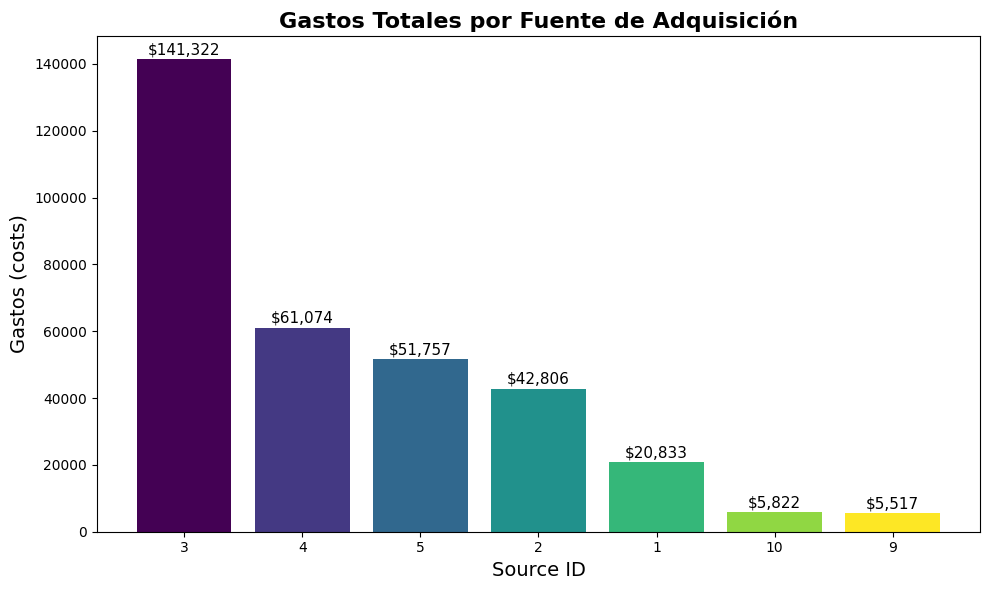

In [17]:
gastos_por_fuente = gastos.groupby("source_id")["costs"].sum().reset_index().sort_values("costs", ascending=False)

# Crea una paleta de colores con viridis.
colors = plt.cm.viridis(np.linspace(0, 1, len(gastos_por_fuente)))

# Crea el gráfico de barras.
plt.figure(figsize=(10,6))
# Grafica de barras con "source_id" en el eje x y "costs" en el eje y.
plt.bar(gastos_por_fuente["source_id"].astype(str), gastos_por_fuente["costs"], color=colors)

# Títulos y etiquetas.
plt.title("Gastos Totales por Fuente de Adquisición", fontsize=16, weight='bold')
plt.xlabel("Source ID", fontsize=14)
plt.ylabel("Gastos (costs)", fontsize=14)

# Añade etiquetas de valores encima de cada barra.
for i, value in enumerate(gastos_por_fuente["costs"]):
    plt.text(i, value + max(gastos_por_fuente["costs"]) * 0.01, f"${value:,.0f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

* Se observa que la fuente con mayor gastos en marketing fue la fuente con id=3.
* También se observa que no se hicieron gastos de marketing en las fuentes 6, 7 y 8.

#### 2.- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [18]:
# Une los DataFrames "pedidos" y "visitas" por la columna "user_id" para saber la fuente del usuario que hizo la compra.
df_merge = pd.merge(pedidos, visitas, on="user_id", how="inner")

# Cuenta cuántos usuarios únicos compraron por cada fuente de adquisición (source_id).
usuarios_unicos_por_fuente = df_merge.groupby("source_id")["user_id"].nunique()

# Suma el total de gastos por cada fuente de adquisición.
gastos_por_fuente = gastos.groupby("source_id")["costs"].sum()

# Calcula el costo de adquisición de clientes (CAC) dividiendo el gasto total
# entre el número de usuarios únicos que compraron desde esa fuente.
costo_adquisicion_por_fuente = gastos_por_fuente / usuarios_unicos_por_fuente

# Muestra el CAC por fuente de adquisición.
costo_adquisicion_por_fuente

source_id
1     20.770957
10    30.168342
2     37.582125
3     94.151652
4     33.723689
5     42.458655
9     14.481601
dtype: float64

#### 3.- ¿Cuán rentables eran las inversiones? (ROMI)

In [19]:
# Agrupa el DataFrame combinado por "source_id" y suma los ingresos (revenue) totales de cada fuente.
ingresos_totales = df_merge.groupby("source_id")["revenue"].sum()

# Calcula el ROMI (Return on Marketing Investment) por fuente.
# La fórmula es (Ingresos - Gastos) / Gastos
romi_por_fuente = (ingresos_totales - gastos_por_fuente) / gastos_por_fuente

# Muestra el ROMI por fuente de adquisición.
romi_por_fuente

source_id
1     9.585296
10   -0.852238
2     4.860932
3    -0.806779
4    -0.384759
5     0.486185
9    -0.455635
dtype: float64

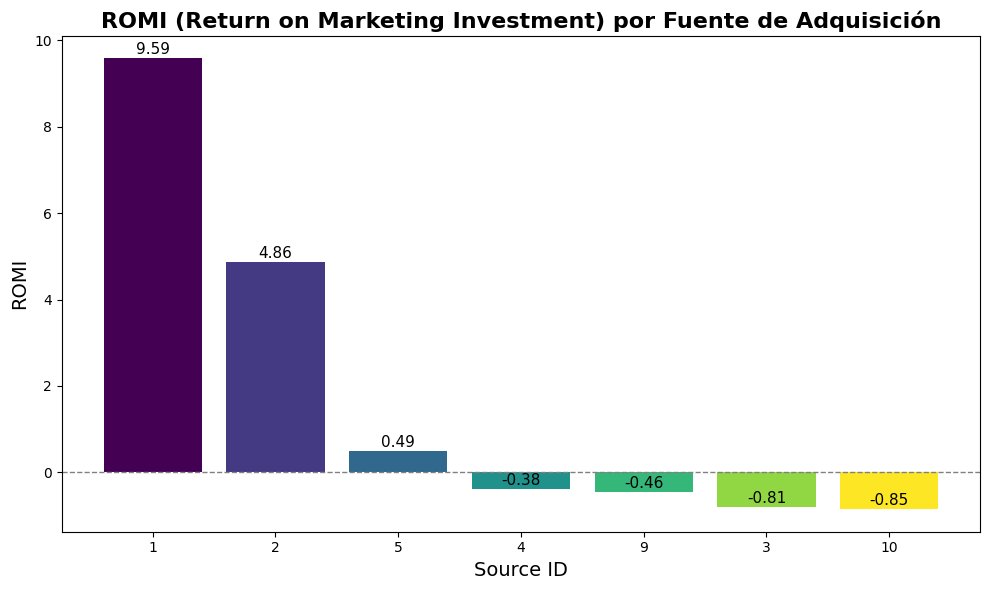

In [20]:
# Ordenar ROMI para mejor visualización.
romi_por_fuente = romi_por_fuente.sort_values(ascending=False)

# Crea una paleta de colores con viridis.
colors = plt.cm.viridis(np.linspace(0, 1, len(romi_por_fuente)))

# Crea el gráfico de barras.
plt.figure(figsize=(10,6))
bars = plt.bar(romi_por_fuente.index.astype(str), romi_por_fuente.values, color=colors)

plt.title("ROMI (Return on Marketing Investment) por Fuente de Adquisición", fontsize=16, weight='bold')
plt.xlabel("Source ID", fontsize=14)
plt.ylabel("ROMI", fontsize=14)

# Muestra valores encima de las barras.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', fontsize=11)

plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.tight_layout()
plt.show()

In [21]:
# Crea un nuevo DF para establecer la relación entre CAC y ROMI.
df_relacion = pd.DataFrame({"CAC": costo_adquisicion_por_fuente, "ROMI": romi_por_fuente})
df_relacion

,CAC,ROMI
source_id,,
1,20.770957,9.585296
10,30.168342,-0.852238
2,37.582125,4.860932
3,94.151652,-0.806779
4,33.723689,-0.384759
5,42.458655,0.486185
9,14.481601,-0.455635


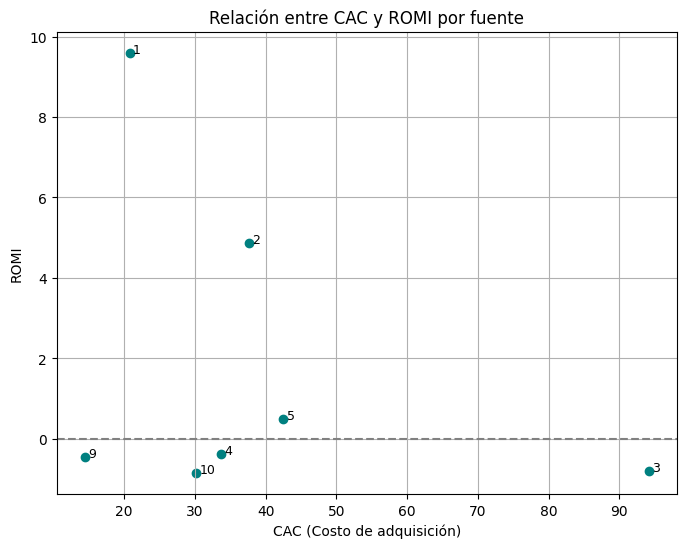

In [22]:
# Establece el tamaño de la figura.
plt.figure(figsize=(8,6))

# Crea un gráfico de dispersión con CAC en el eje X y ROMI en el eje Y.
plt.scatter(df_relacion["CAC"], df_relacion["ROMI"], color="teal")

# Agrega una etiqueta de texto con el source_id a cada punto del gráfic
for source_id in df_relacion.index:
    plt.text(df_relacion.loc[source_id, "CAC"] + 0.5, 
             df_relacion.loc[source_id, "ROMI"], 
             str(source_id), fontsize=9)

# Etiquetas de los ejes.
plt.xlabel("CAC (Costo de adquisición)")
plt.ylabel("ROMI")

# Título del gráfico.
plt.title("Relación entre CAC y ROMI por fuente")

# Línea horizontal en Y=0 para marcar el umbral de rentabilidad.
plt.axhline(0, color="gray", linestyle="--")

# Activa la cuadrícula del gráfico para facilitar la lectura visual.
plt.grid(True)

# Muestra el gráfico.
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo hasta este punto! Calculaste muy bien las métricas de negocio y las explicas correctamente con las gráficas y tus comentarios lo cual deja claro el mensaje que se quiere compartir sin importar si la audiencia a la que expongas tus resultados sea técnica o no.
</div>

## **Conclusiones**  

* Los resultados gráficos indican que **la fuente más rentable es la N° 1**:

  - CAC bajo: \$20.77  
  - ROMI muy alto: \$9.58
   
**Recomendación**: Esto representa una fuente eficiente y rentable. Se recomienda mantener o incluso aumentar la inversión en este canal.

* Por el lado contrario, **la fuente menos efectivo fue la N° 3**:
  
  - CAC más alto: \$94.15
  - ROMI negativo: \$-0.81

**Recomendación**: Analizar si se puede mejorar la conversión en estos canales o si conviene redirigir presupuesto a fuentes más rentables.  

* Fuentes con resultados mixtos:
  
  - source_id 5: CAC relativamente alto \\$42.45, pero ROMI positivo \$0.48.
  - source_id 2: Buen balance con ROMI \\$4.86 y CAC moderado \$37.58.

**Recomendación**: Optimizar, no eliminar. Podrían tener potencial con ajustes menores.

    

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen análisis de este proyecto, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>